<a href="https://colab.research.google.com/github/saravanan7777/detection-of-ssh-attack/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
LDAP = pd.read_csv('/LDAP11.csv')
Portmap = pd.read_csv('/Portmap1.csv')
UDPLag=pd.read_csv('/UDPLag11.csv')
data = pd.concat([LDAP,Portmap,UDPLag], ignore_index = True)


In [4]:

data.head(5)

,Unnamed: 0,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,SimillarHTTP,Bwd Packets/s,...,Flow Bytes/s,Max Packet Length,Protocol.1,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets.1,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,73,0,0,6,1.500000,1.00000,3,1,0,240.22293,...,2978.76440,31,6,48.044586,288.267520,0,0,443,0,BENIGN
1,75,0,0,276,138.000000,190.91884,273,3,0,87.89921,...,703.19366,6,6,29.299736,117.198944,6,6,443,0,BENIGN
2,161222,0,0,4,1.333333,0.57735,2,1,0,39215.68800,...,235294.12000,6,6,9803.922000,49019.610000,0,0,57816,0,BENIGN
3,112233,0,0,3,3.000000,0.00000,3,3,0,31250.00000,...,0.00000,0,6,15625.000000,46875.000000,0,0,43898,0,BENIGN
4,194026,0,0,2,2.000000,0.00000,2,2,0,21505.37700,...,193548.39000,6,6,10752.688000,32258.064000,6,6,44764,0,BENIGN


In [5]:

data.columns 
     

Index(['Unnamed: 0', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'SimillarHTTP', ' Bwd Packets/s', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Flow Duration',
       ' Total Length of Bwd Packets', ' Total Backward Packets', ' Protocol',
       ' Inbound', ' Timestamp', ' Source Port', ' Min Packet Length',
       ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean',
       ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       ' Max Packet Length', ' Protocol.1', 'Fwd Packets/s', ' Flow Packets/s',
       'Total Length of Fwd Packets.1', ' Subflow Fwd Bytes',
       ' Destination Port', ' act_data_pkt_fwd', ' Label'],
      dtype='object')

In [7]:
data.shape

(15000, 38)

In [6]:

data.describe()

,Unnamed: 0,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd Packets/s,Total Fwd Packets,...,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol.1,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets.1,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
count,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,1.500000e+04,15000.000000,...,15000.000000,1.499800e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,128270.938267,5.416747e+06,5.677884e+04,9.356241e+06,7.615474e+05,1.559986e+06,4.550104e+06,1.297267,4.228639e+03,10.219400,...,157.805400,1.241995e+08,366.352067,10.472533,3.284016e+05,3.326302e+05,880.637867,880.637867,18349.015533,6.371267
std,159477.823519,1.303250e+07,1.206210e+06,2.672721e+07,2.356781e+06,4.580719e+06,1.326606e+07,3.711094,5.434819e+04,226.918144,...,288.262323,3.830021e+08,673.990813,5.487032,5.668697e+05,5.699931e+05,3484.242497,3484.242497,22985.496829,155.304580
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,...,0.000000,-1.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1168.000000,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.000000,...,6.000000,1.104596e+02,6.000000,6.000000,2.841260e+00,6.345636e+00,24.000000,24.000000,80.000000,1.000000
50%,71465.500000,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000,2.375712e-01,2.000000,...,32.250000,1.244525e+04,58.500000,6.000000,9.632519e+01,1.926272e+02,78.000000,78.000000,443.000000,1.000000
75%,177065.000000,2.058458e+05,3.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,2.000000,9.421963e+01,6.000000,...,169.666670,3.700000e+07,380.000000,17.000000,6.666667e+05,6.666667e+05,760.000000,760.000000,39872.250000,3.000000
max,610831.000000,1.097105e+08,4.915212e+07,1.199473e+08,3.440100e+07,5.958428e+07,1.032030e+08,96.000000,2.000000e+06,20444.000000,...,2131.000000,2.944000e+09,3617.000000,17.000000,3.000000e+06,3.000000e+06,188320.000000,188320.000000,65519.000000,18766.000000


In [8]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [9]:
data_real = data.replace(np.inf, np.nan)
data_real.isnull().sum().sum()
data_ = data_real.dropna(axis=0)
data_.isnull().sum().sum()

0

In [10]:
data[' Label'].value_counts()

BENIGN     9196
UDPLag     1873
Syn        1771
Portmap    1293
LDAP        406
UDP         333
NetBIOS     128
Name:  Label, dtype: int64

In [11]:

df = data_[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]

df = pd.DataFrame(data,columns=[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd'])
corrMatrix = df.corr()
print (corrMatrix)
     

                               Bwd Packets/s   Total Fwd Packets  \
 Bwd Packets/s                      1.000000           -0.002335   
 Total Fwd Packets                 -0.002335            1.000000   
Total Length of Fwd Packets        -0.018677            0.244058   
 Flow Duration                     -0.036880            0.041612   
 Total Length of Bwd Packets       -0.000194            0.743909   
 Total Backward Packets            -0.000914            0.745387   
 Protocol                          -0.062849           -0.035403   
 Inbound                            0.079972           -0.008445   
 Min Packet Length                 -0.035865           -0.016818   
 Fwd Packet Length Min             -0.031282           -0.016890   
 Packet Length Mean                -0.043899            0.027219   
 Fwd Packet Length Max             -0.039264            0.030065   
 Average Packet Size               -0.041933            0.013146   
 ACK Flag Count                    -0.032443    

<ipython-input-12-5b7a1c64b2f3>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(result[' Label'],result[' Total Fwd Packets'], use_line_collection = True)


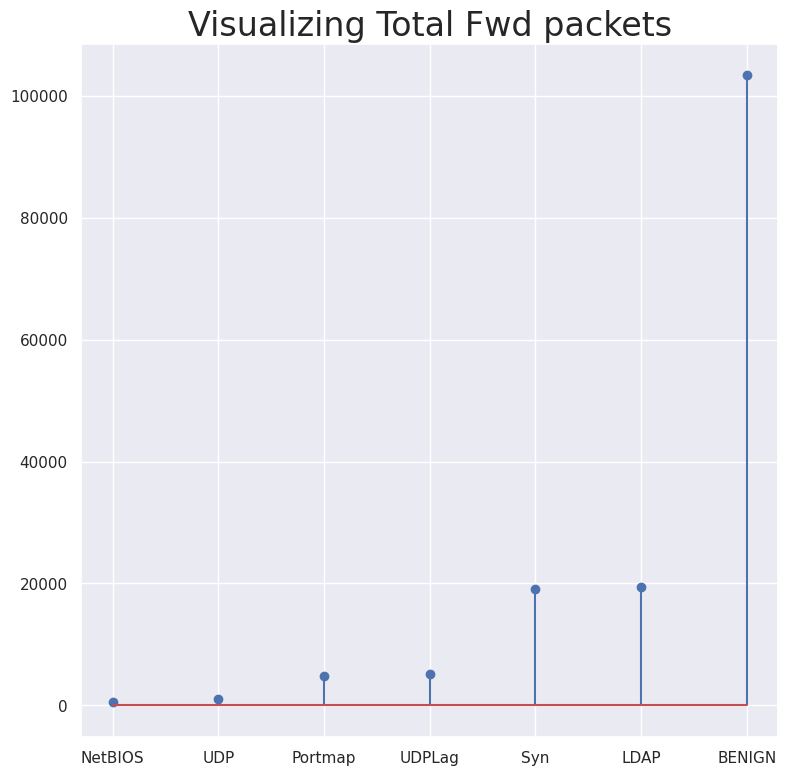

In [12]:
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="darkgrid")
plt.figure(figsize=(9,9))
result = data_.groupby([" Label"])[' Total Fwd Packets'].sum().reset_index().sort_values(' Total Fwd Packets')
plt.stem(result[' Label'],result[' Total Fwd Packets'], use_line_collection = True)

plt.title('Visualizing Total Fwd packets', fontsize=24);
plt.show()

<ipython-input-13-e38bf73bf086>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


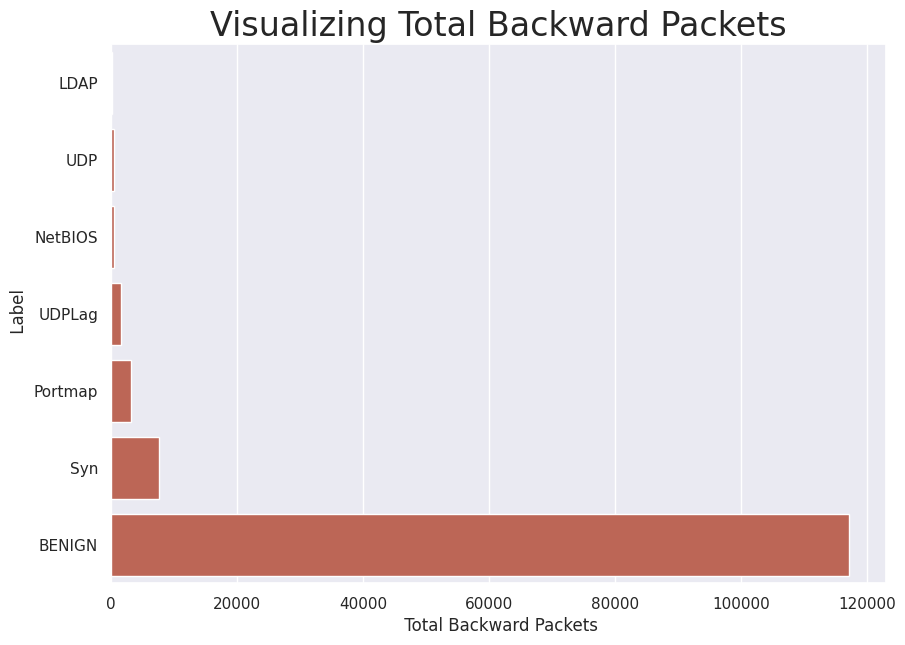

In [13]:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
df1=data_[[' Label',' Total Backward Packets']]
result1 = df1.groupby([" Label"])[' Total Backward Packets'].sum().reset_index().sort_values(' Total Backward Packets')
plt.title('Visualizing Total Backward Packets', fontsize=24);

sns.barplot(
    x=" Total Backward Packets", 
    y=" Label",  
    data=result1,
    estimator=sum, 
    ci=None, 
    color='#CD5B45');

Text(0, 0.5, ' Protocol')

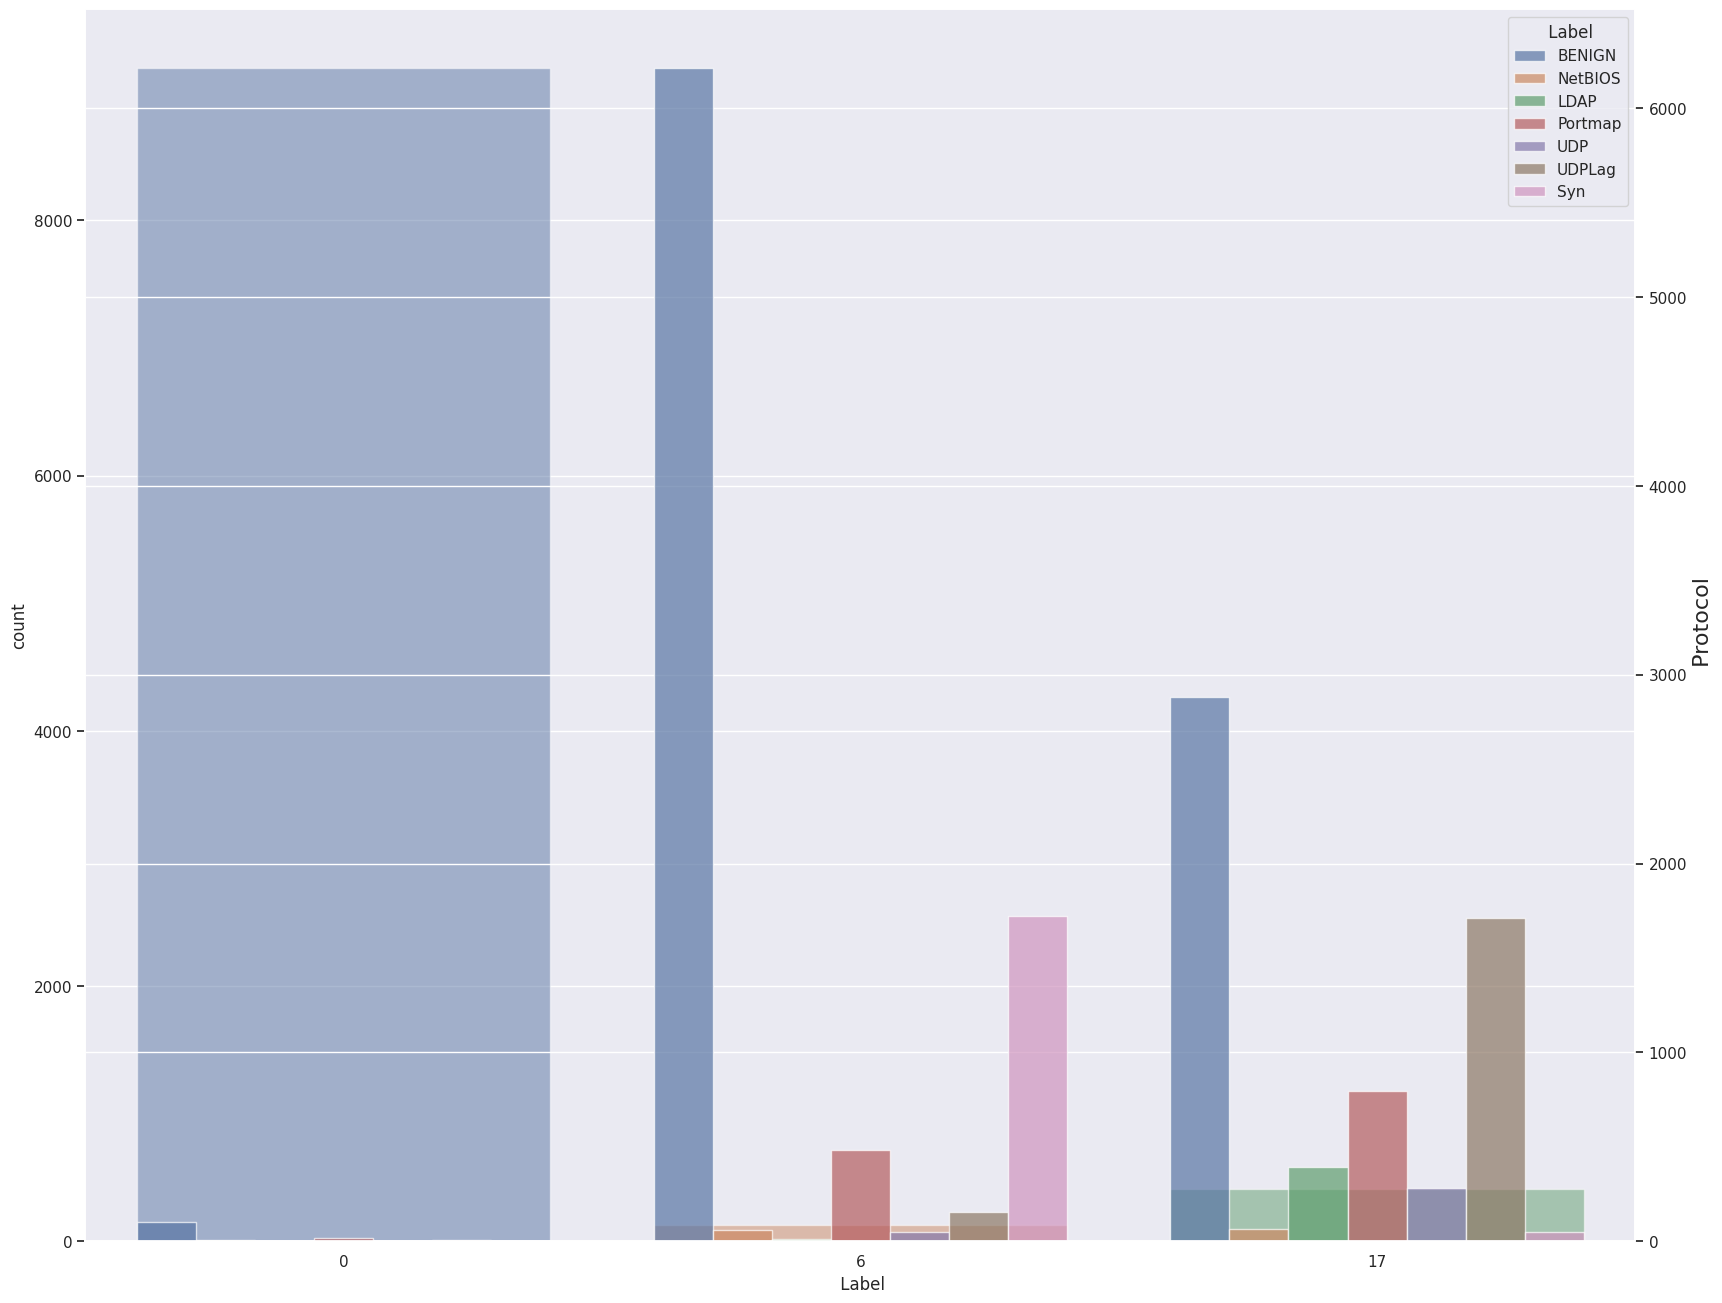

In [14]:

plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Protocol', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(" Protocol", fontsize=16)

Text(0, 0.5, ' Inbound')

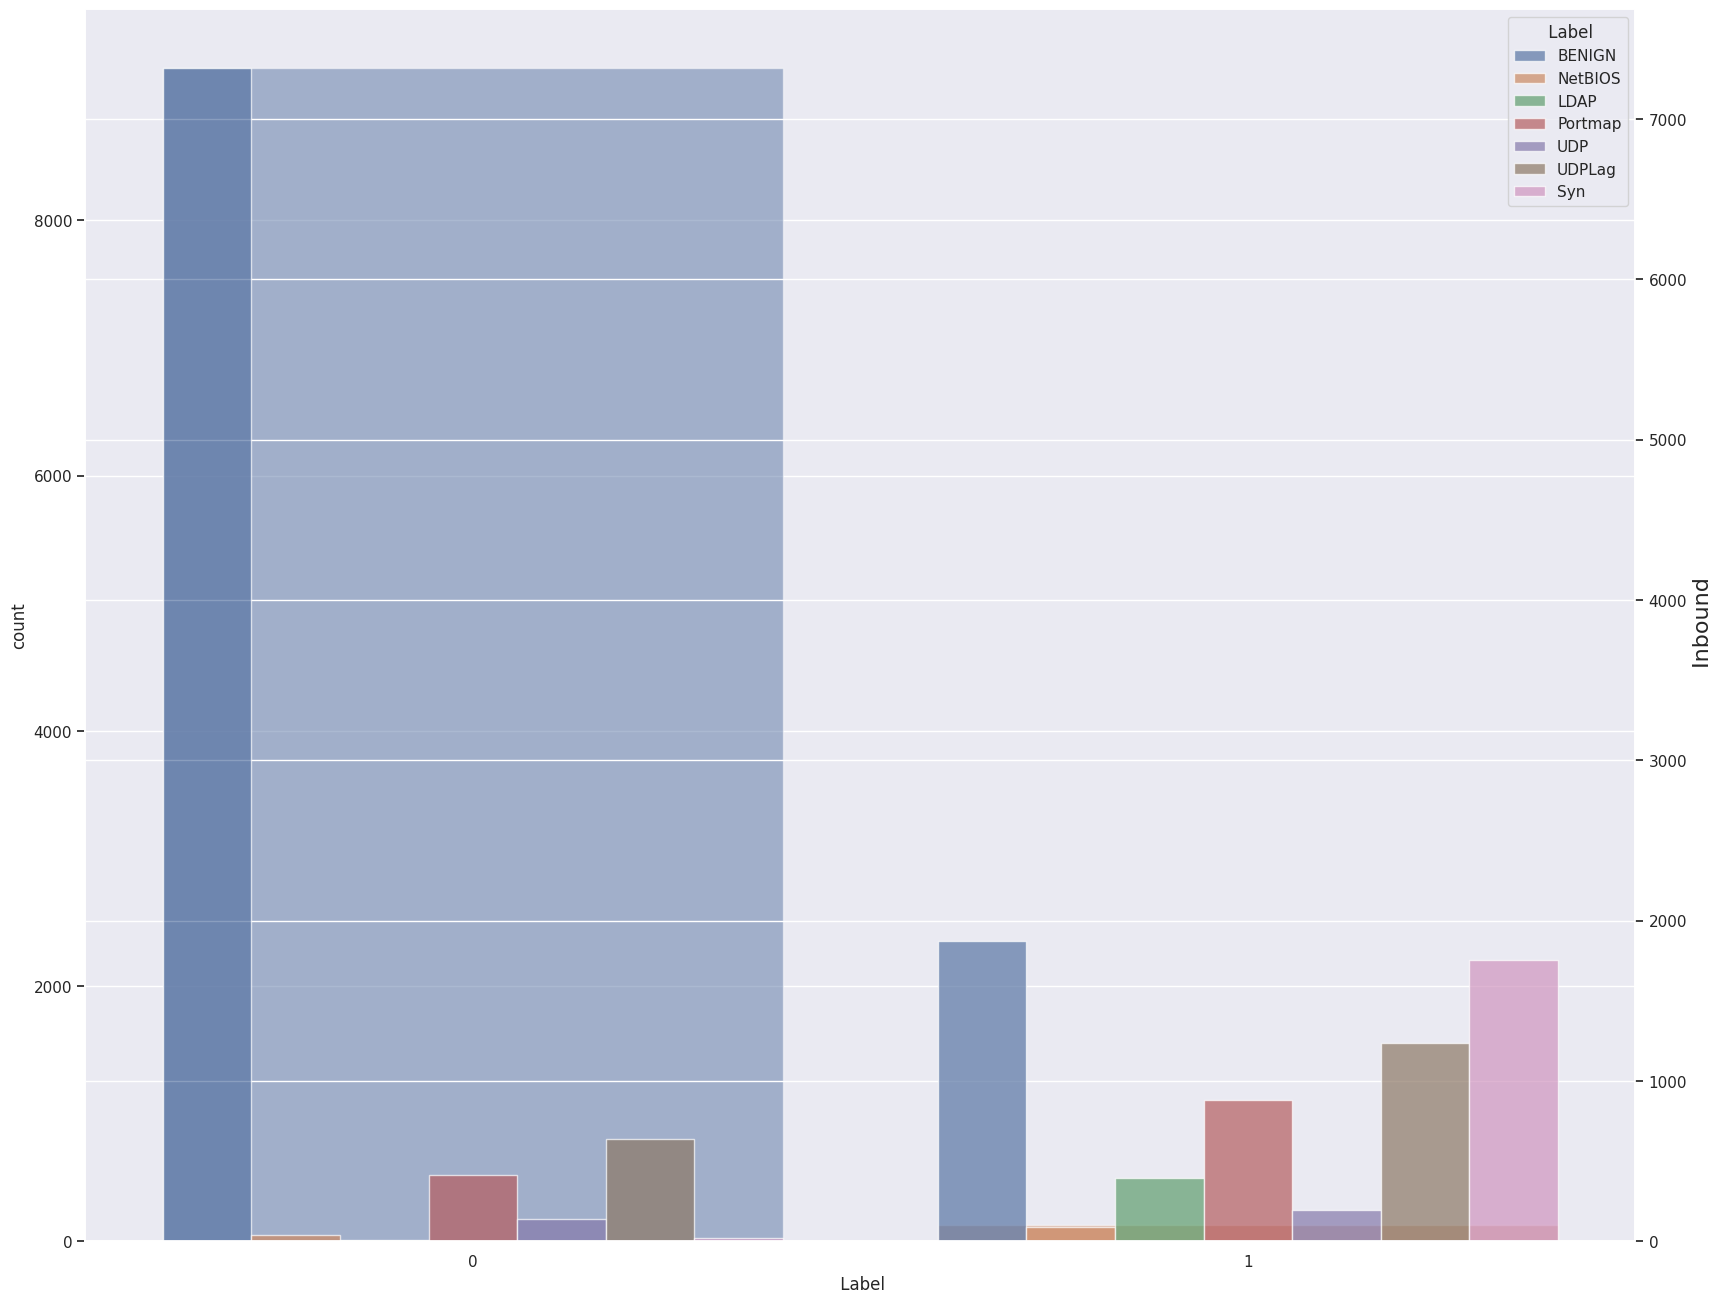

In [15]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Inbound', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(' Inbound', fontsize=16)
     

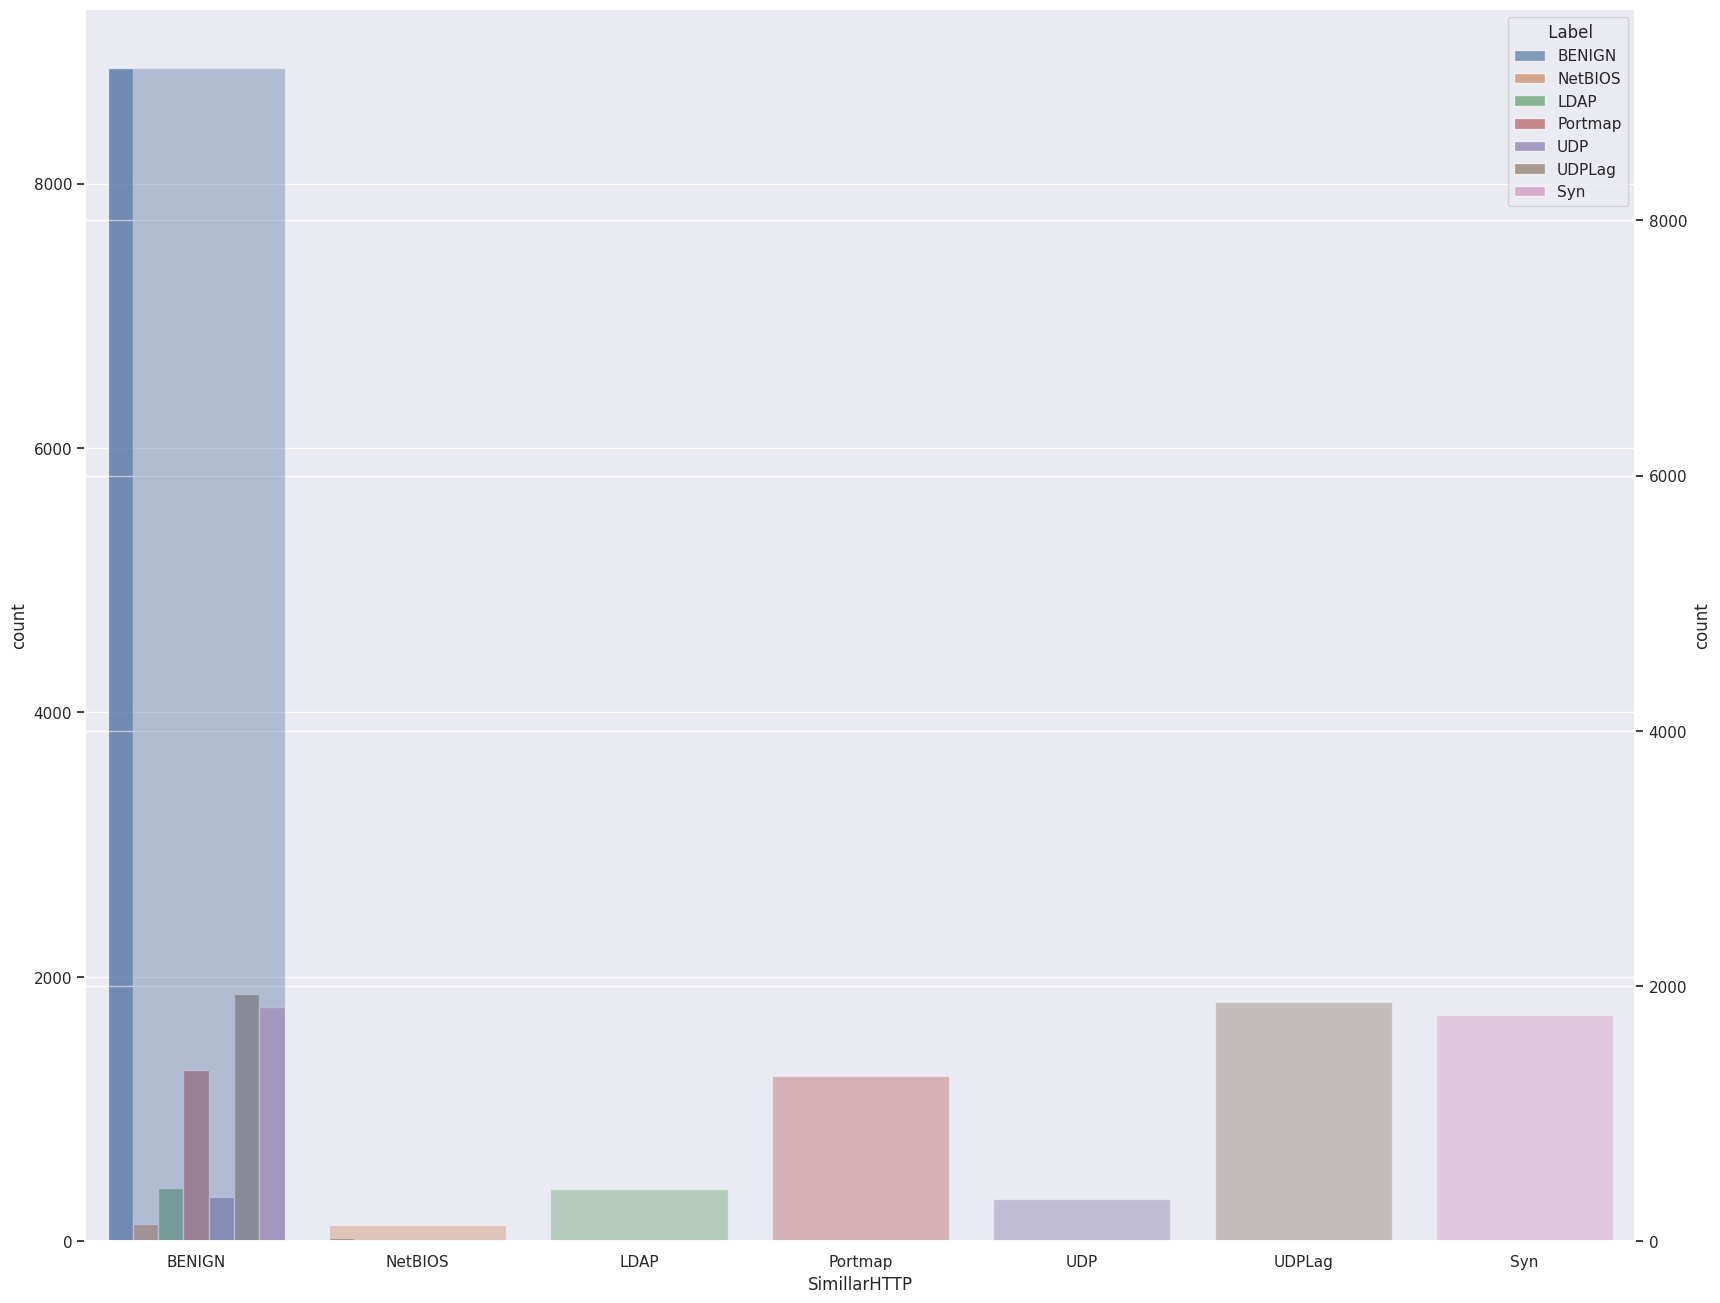

In [16]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x='SimillarHTTP', hue=' Label',alpha=0.7, data=data_)
gt = g1.twinx()
gt = sns.countplot(x=' Label', data=data_,alpha=0.4)

In [17]:

df2 = data_[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]
df2.dtypes
     

 Bwd Packets/s                  float64
 Total Fwd Packets                int64
Total Length of Fwd Packets       int64
 Flow Duration                    int64
 Total Length of Bwd Packets      int64
 Total Backward Packets           int64
 Protocol                         int64
 Inbound                          int64
 Min Packet Length                int64
 Fwd Packet Length Min            int64
 Packet Length Mean             float64
 Fwd Packet Length Max            int64
 Average Packet Size            float64
 ACK Flag Count                   int64
 Avg Fwd Segment Size           float64
 Fwd Packet Length Mean         float64
 Max Packet Length                int64
 Protocol                         int64
Fwd Packets/s                   float64
Total Length of Fwd Packets       int64
 Subflow Fwd Bytes                int64
 act_data_pkt_fwd                 int64
dtype: object

In [18]:
data_X = data_.drop([' Label','SimillarHTTP'], axis = 1)

In [19]:
data_X.shape 

(14998, 35)

In [20]:
data_y = data_[' Label']

In [21]:
data_y.shape 

(14998,)

In [22]:
#Encoding Label
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)

In [23]:

data_y_trans

array([0, 0, 0, ..., 4, 4, 4])

In [24]:
le_fid = LabelEncoder()
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [25]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)
     

ExtraTreesClassifier(random_state=42)

In [27]:

model.feature_importances_

array([0.01615847, 0.00288346, 0.00754073, 0.00480364, 0.00439745,
       0.00589336, 0.00184655, 0.00684927, 0.00789361, 0.01118142,
       0.04088121, 0.00178303, 0.00239465, 0.02717739, 0.08269893,
       0.1127396 , 0.03330022, 0.06753121, 0.05341615, 0.11693218,
       0.02388207, 0.02439073, 0.03553393, 0.06223284, 0.03734076,
       0.03822838, 0.02284289, 0.02257587, 0.02266914, 0.01742647,
       0.01317068, 0.0145451 , 0.00920886, 0.0369491 , 0.01070065])

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

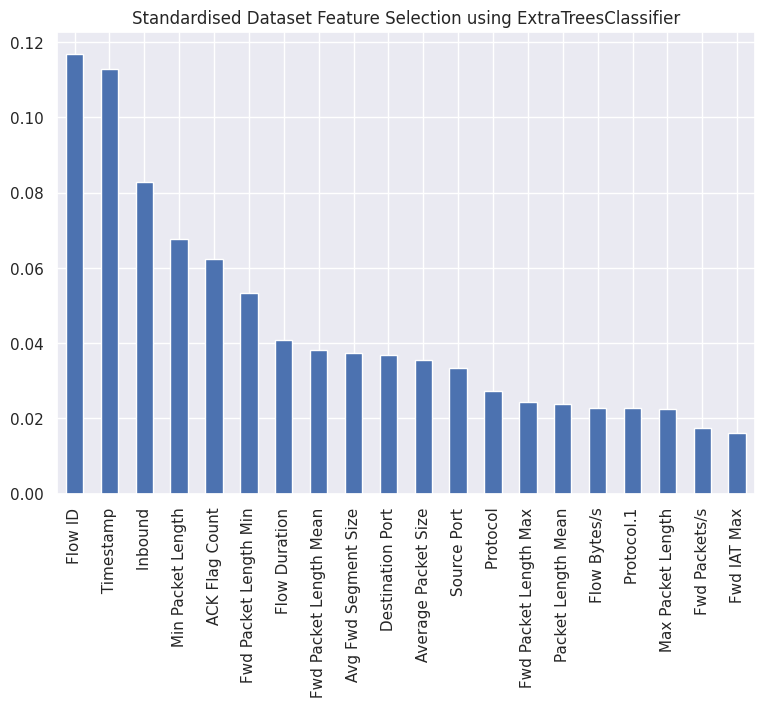

In [28]:

plt.figure(figsize=(9,6))
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [29]:
data_new_20features_X = data_X[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [31]:
X_train.shape 


(10498, 35)

In [32]:
X_test.shape 


(4500, 35)

In [33]:
X_train.describe


<bound method NDFrame.describe of         Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean   Bwd IAT Std  \
5898              1             1              1          1.000          0.00   
13111             3             3              0          0.000          0.00   
1574       10244029             2       51199854    4654532.000    5347648.00   
12995             3             3              0          0.000          0.00   
881         5157165             2          85780      12254.286      23885.16   
...             ...           ...            ...            ...           ...   
5193            120             3              0          0.000          0.00   
13420      21153707             1       42943155    6134736.500   10706940.00   
5392              2             2              0          0.000          0.00   
862        10046417             2      110391213    3806593.500    4935812.00   
7272              0             0              2          2.000          0.

In [35]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [36]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

In [37]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [38]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)

DecisionTreeClassifier()

In [39]:
dt_y_pred = dt.predict(X_test_std_20)


In [40]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

      BENIGN       0.93      0.89      0.91      2763
        LDAP       1.00      0.95      0.97       115
     NetBIOS       0.85      0.52      0.65        44
     Portmap       0.57      0.19      0.28       369
         Syn       0.74      0.94      0.83       516
         UDP       0.04      0.04      0.04       110
      UDPLag       0.65      0.92      0.76       583

    accuracy                           0.82      4500
   macro avg       0.68      0.63      0.63      4500
weighted avg       0.82      0.82      0.80      4500



In [41]:


dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)
     

Decision Tree Confusion: 
 [[2447    0    3   42    0  101  170]
 [   2  109    0    0    4    0    0]
 [  15    0   23    1    0    3    2]
 [ 123    0    0   69  155    4   18]
 [  18    0    0    0  486    0   12]
 [  13    0    0    3    0    4   90]
 [  24    0    1    7   14    1  536]]


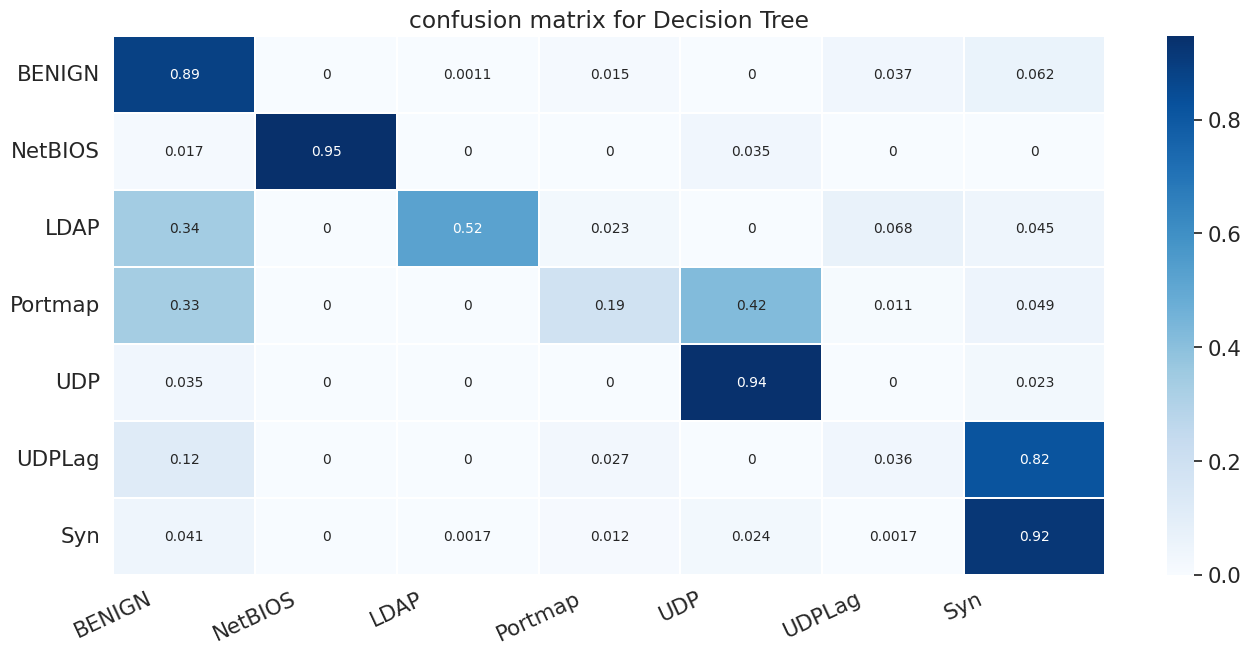

In [42]:
matrix = dt_conf_mat.astype('float') / dt_conf_mat.sum(axis=1)[:, np.newaxis] 

# Construire le tracé 
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Blues, linewidths=0.2) 

# Ajouter des étiquettes à l'intrigue 
class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 

plt.title('confusion matrix for Decision Tree') 
plt.show()

In [43]:

acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

Accuracy Score for Decision Tree: 
 81.64444444444445


In [44]:

from sklearn.naive_bayes import GaussianNB 
     

In [45]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [46]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))


Classification Report for Naive Bayes: 
               precision    recall  f1-score   support

      BENIGN       0.78      0.98      0.87      2763
        LDAP       0.00      0.00      0.00       115
     NetBIOS       0.00      0.00      0.00        44
     Portmap       0.18      0.09      0.12       369
         Syn       1.00      0.02      0.04       516
         UDP       0.00      0.00      0.00       110
      UDPLag       0.00      0.00      0.00       583

    accuracy                           0.61      4500
   macro avg       0.28      0.16      0.15      4500
weighted avg       0.61      0.61      0.55      4500



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)

Naive Bayes Confusion Matrix: 
 [[2709    0   43   11    0    0    0]
 [   2    0    4  109    0    0    0]
 [  44    0    0    0    0    0    0]
 [ 153    0  184   32    0    0    0]
 [ 494    0    9    3   10    0    0]
 [  21    0   88    0    0    0    1]
 [  46    0  519   18    0    0    0]]


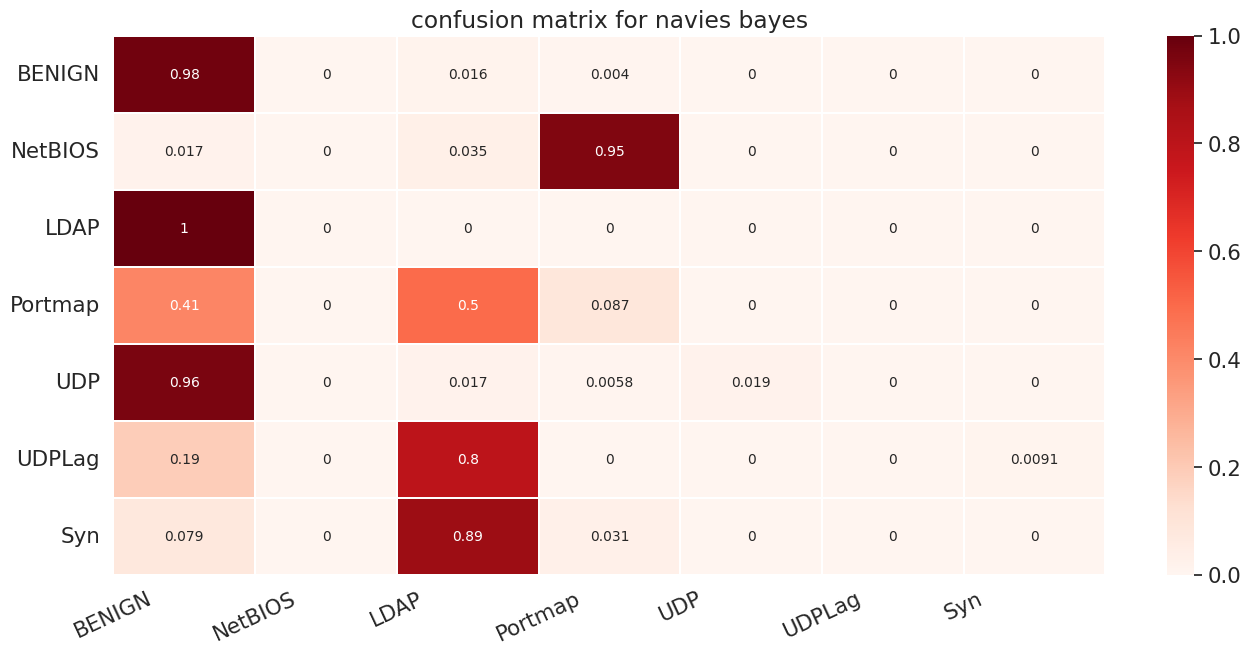

In [48]:
matrix = gnb_conf_mat.astype('float') / gnb_conf_mat.sum(axis=1)[:, np.newaxis] 

# Construire le tracé 
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Reds, linewidths=0.2) 

# Ajouter des étiquettes à l'intrigue 
class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 

plt.title('confusion matrix for navies bayes') 
plt.show()

In [49]:

acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 61.133333333333326


In [50]:
### 1. Random Forest Classification 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)
rf_y_pred = rf.predict(X_test_std_20)

In [51]:

rf_y_pred

array([4, 3, 0, ..., 0, 0, 0])

In [52]:
#Rapport ( Random forest)

print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

      BENIGN       0.95      1.00      0.97      2763
        LDAP       1.00      0.95      0.97       115
     NetBIOS       0.92      0.52      0.67        44
     Portmap       0.89      0.77      0.82       369
         Syn       0.98      0.92      0.95       516
         UDP       0.23      0.33      0.27       110
      UDPLag       0.86      0.71      0.78       583

    accuracy                           0.91      4500
   macro avg       0.83      0.74      0.78      4500
weighted avg       0.92      0.91      0.91      4500



In [53]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[2763    0    0    0    0    0    0]
 [   2  109    0    4    0    0    0]
 [  16    0   23    5    0    0    0]
 [  77    0    1  285    1    1    4]
 [  22    0    0    6  476    0   12]
 [  16    0    0    5    0   36   53]
 [  26    0    1   17    7  117  415]]


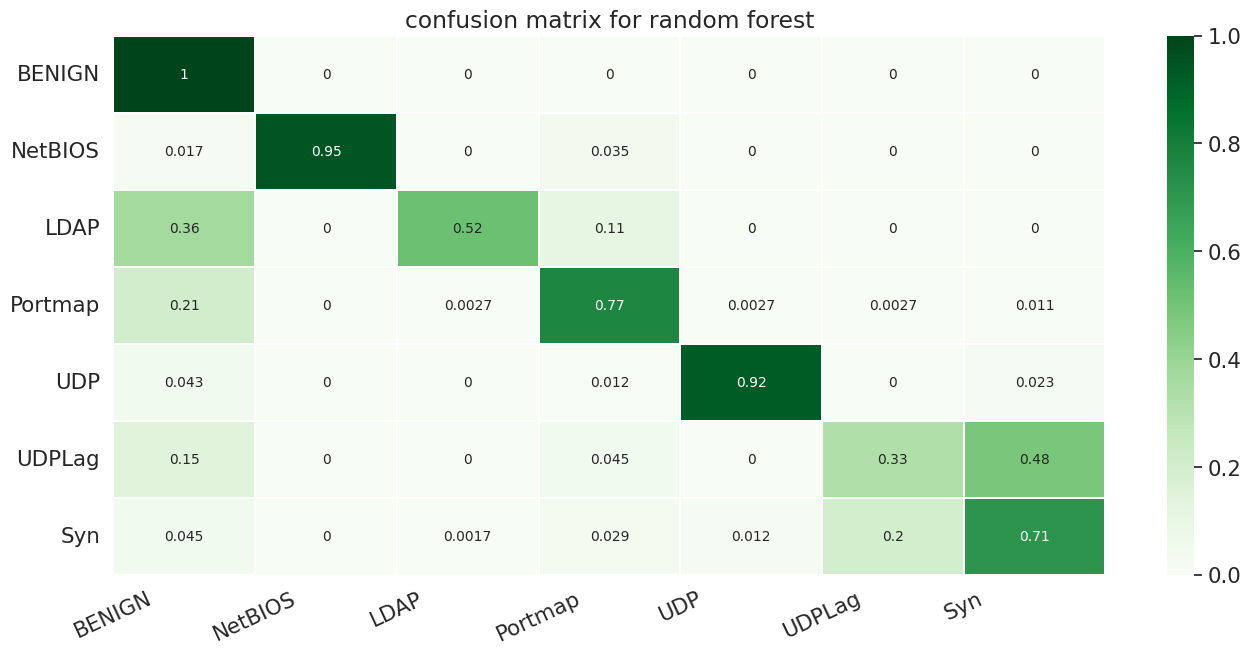

In [54]:


matrix = rf_conf_mat.astype('float') / rf_conf_mat.sum(axis=1)[:, np.newaxis] 


plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Greens, linewidths=0.2) 


class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 

plt.title('confusion matrix for random forest') 
plt.show()

In [55]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 91.26666666666667


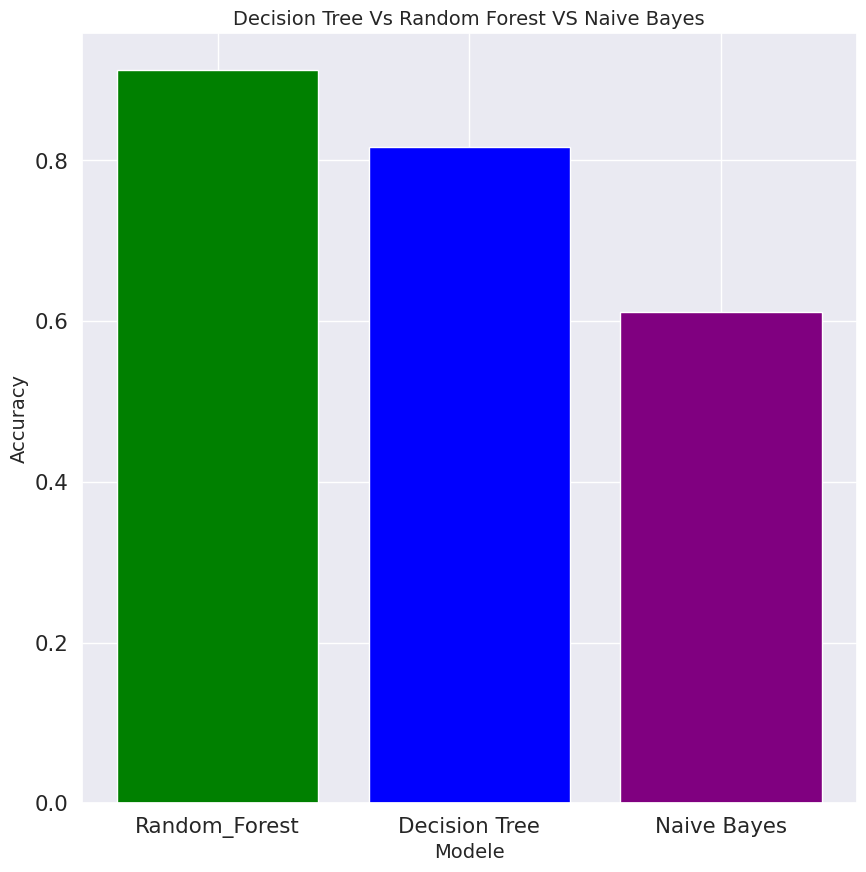

In [56]:
import matplotlib.pyplot as plt
   
Country = ['Random_Forest','Decision Tree','Naive Bayes']
GDP_Per_Capita = [acc_score,acc_score_dt,acc_score_gnb]
plt.figure(figsize=(10,10))
New_Colors = ['green','blue','purple']
plt.bar(Country, GDP_Per_Capita, color=New_Colors)
plt.title('Decision Tree Vs Random Forest VS Naive Bayes', fontsize=14)
plt.xlabel('Modele', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()